# **Implementation of Regression models on Household Power Consumption**



**Life cycle of Machine learning Project** 

*  Understanding the Problem Statement
*  Data Ingestion

*  Data Cleaning
*  Exploratory data analysis

*  Data Pre-Processing
*  Model Training




















1.   **Problem statement**

*   The dataSet consists of 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).
*  Using this data we need to predict the energy consumption of the houshol


2.    **Data Collection**

*   The Dataset is collected from Website named, UCI Machine Learning Repository.
*  Link for dataset - https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

*  This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).








***Importing important libraries***

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

3. **Data Ingection**

***Loading Dataset***

In [89]:
df=pd.read_csv('household_power_consumption.txt',sep=';')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [90]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


***Shape and Basic Info about the data***

In [91]:
df.shape

(2075259, 9)

In [92]:
df.info

<bound method DataFrame.info of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  \


In [93]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

***Since the dataset is too large so we will select a sample of the dataset***

In [94]:
df_sample=df.sample(30000)

In [95]:
df_sample.shape

(30000, 9)

In [96]:
df_sample.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
579616,23/1/2008,05:40:00,0.464,0.086,241.820,2.200,0.000,2.000,0.0
1049617,14/12/2008,15:01:00,3.496,0.344,241.260,14.600,1.000,37.000,0.0
21696,31/12/2006,19:00:00,2.448,0.100,235.300,10.400,0.000,0.000,0.0
1908920,3/8/2010,08:44:00,0.310,0.000,242.170,1.400,0.000,0.000,1.0
1744015,10/4/2010,20:19:00,0.616,0.070,243.510,2.600,0.000,0.000,1.0


***Resetting the index of the sample dataframe***

In [97]:
df_sample.reset_index(inplace=True,drop=True)

In [98]:
df_sample

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,23/1/2008,05:40:00,0.464,0.086,241.820,2.200,0.000,2.000,0.0
1,14/12/2008,15:01:00,3.496,0.344,241.260,14.600,1.000,37.000,0.0
2,31/12/2006,19:00:00,2.448,0.100,235.300,10.400,0.000,0.000,0.0
3,3/8/2010,08:44:00,0.310,0.000,242.170,1.400,0.000,0.000,1.0
4,10/4/2010,20:19:00,0.616,0.070,243.510,2.600,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
29995,14/7/2010,23:46:00,2.634,0.052,240.190,11.000,1.000,0.000,19.0
29996,15/10/2007,10:43:00,1.358,0.086,237.800,5.600,0.000,0.000,17.0
29997,22/6/2007,01:39:00,0.296,0.254,241.630,1.600,0.000,1.000,0.0
29998,25/5/2009,00:40:00,0.400,0.210,244.230,1.800,0.000,0.000,0.0


**4. Data Cleaning**

In [99]:
df_sample.replace(',',np.nan,inplace=True)
df_sample.replace('',np.nan,inplace=True)
df_sample.replace('nan',np.nan,inplace=True)
df_sample.replace('?',np.nan,inplace=True)


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


***Also we now create seperate columns for day,month,year,hour and minute from the Date and Time Columns***

In [101]:
df_sample['Date']=pd.to_datetime(df_sample['Date'])
df_sample['Day']=df_sample['Date'].dt.day
df_sample['Month']=df_sample['Date'].dt.month
df_sample['Year']=df_sample['Date'].dt.year

df_sample['Hour']=pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.hour
df_sample['Minutes']=pd.to_datetime(df_sample['Time'],format='%H:%M:%S').dt.minute

***Converting Datatype to float***

In [102]:
for item in df_sample.columns:
    if df_sample[str(item)].dtype == 'O' and item != 'Time':
        df_sample[str(item)] = df_sample[str(item)].astype(float)


In [103]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   30000 non-null  datetime64[ns]
 1   Time                   30000 non-null  object        
 2   Global_active_power    29596 non-null  float64       
 3   Global_reactive_power  29596 non-null  float64       
 4   Voltage                29596 non-null  float64       
 5   Global_intensity       29596 non-null  float64       
 6   Sub_metering_1         29596 non-null  float64       
 7   Sub_metering_2         29596 non-null  float64       
 8   Sub_metering_3         29596 non-null  float64       
 9   Day                    30000 non-null  int64         
 10  Month                  30000 non-null  int64         
 11  Year                   30000 non-null  int64         
 12  Hour                   30000 non-null  int64         
 13  M

***Null Values***

In [104]:
df_sample.isnull().sum()

Date                       0
Time                       0
Global_active_power      404
Global_reactive_power    404
Voltage                  404
Global_intensity         404
Sub_metering_1           404
Sub_metering_2           404
Sub_metering_3           404
Day                        0
Month                      0
Year                       0
Hour                       0
Minutes                    0
dtype: int64

*There are null values in the dataset , Since the dataset has mostly float values so we will replace the null values by the median of the dataset.*

In [105]:
for item in df_sample.columns:
  if df_sample[str(item)].isnull().sum()>0:
      df_sample[str(item)]=df_sample[str(item)].fillna(df_sample[str(item)].median())


In [106]:
df_sample.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Day                      0
Month                    0
Year                     0
Hour                     0
Minutes                  0
dtype: int64

***Duplicated entries***

In [107]:
df_sample.duplicated().sum()

0

***Creating Column For Total Metering***

In [108]:
df_sample['Total_meetering']=df_sample['Sub_metering_1']+df_sample['Sub_metering_2']+df_sample['Sub_metering_3']

In [109]:
df_sample.sample()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Day,Month,Year,Hour,Minutes,Total_meetering
4705,2010-12-11,03:30:00,0.376,0.18,245.6,1.6,0.0,1.0,0.0,11,12,2010,3,30,1.0


***Dropping non relevant columns***

In [110]:
df_sample.drop(columns=['Date','Time','Sub_metering_1','Sub_metering_2','Sub_metering_3'],inplace=True)

In [111]:
df_sample.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Day', 'Month', 'Year', 'Hour', 'Minutes',
       'Total_meetering'],
      dtype='object')

In [112]:
df_sample.shape

(30000, 10)

**5. EDA**

***Description of the data***

In [113]:
df_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,30000.0,1.071288,1.038897,0.078,0.310,0.584,1.510,8.526
Global_reactive_power,30000.0,0.123046,0.111418,0.000,0.048,0.100,0.192,1.070
Voltage,30000.0,240.831555,3.237285,225.320,239.010,241.010,242.830,252.860
Global_intensity,30000.0,4.545980,4.365132,0.200,1.400,2.600,6.200,36.800
Day,30000.0,15.671433,8.847370,1.000,8.000,16.000,23.000,31.000
Month,30000.0,6.450900,3.426891,1.000,4.000,6.000,9.000,12.000
Year,30000.0,2008.443967,1.126988,2006.000,2007.000,2008.000,2009.000,2010.000
Hour,30000.0,11.464533,6.917818,0.000,5.000,12.000,17.000,23.000
Minutes,30000.0,29.380267,17.357025,0.000,14.000,29.000,44.000,59.000
Total_meetering,30000.0,8.642333,12.663134,0.000,0.000,1.000,18.000,119.000


In [114]:
df_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,Total_meetering
0,0.464,0.086,241.82,2.2,23,1,2008,5,40,2.0
1,3.496,0.344,241.26,14.6,14,12,2008,15,1,38.0
2,2.448,0.100,235.30,10.4,31,12,2006,19,0,0.0
3,0.310,0.000,242.17,1.4,8,3,2010,8,44,1.0
4,0.616,0.070,243.51,2.6,4,10,2010,20,19,1.0


***Saving this Cleaned data***

In [115]:
df_sample.to_csv("cleaned_household_power_consumption_data.csv")


In [116]:
df_new=pd.DataFrame()


In [117]:
df_new=df_sample

In [118]:
df_new.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Day,Month,Year,Hour,Minutes,Total_meetering
0,0.464,0.086,241.82,2.2,23,1,2008,5,40,2.0
1,3.496,0.344,241.26,14.6,14,12,2008,15,1,38.0
2,2.448,0.100,235.30,10.4,31,12,2006,19,0,0.0
3,0.310,0.000,242.17,1.4,8,3,2010,8,44,1.0
4,0.616,0.070,243.51,2.6,4,10,2010,20,19,1.0


In [119]:
df_new.shape

(30000, 10)

**6. Preprocessing**

In [120]:
x=df_new.drop(['Day','Month','Year','Hour','Minutes','Total_meetering'],axis=1)
y=df_new['Total_meetering']

In [121]:
x.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,0.464,0.086,241.82,2.2
1,3.496,0.344,241.26,14.6
2,2.448,0.100,235.30,10.4
3,0.310,0.000,242.17,1.4
4,0.616,0.070,243.51,2.6


In [122]:
y.head()

0     2.0
1    38.0
2     0.0
3     1.0
4     1.0
Name: Total_meetering, dtype: float64

***Splitting train and test data***

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=36)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((20100, 4), (20100,), (9900, 4), (9900,))

***Feature Scaling***

In [124]:
def scaler_standard(x_train,x_test):
  scaler=StandardScaler()
  x_train_scaled=scaler.fit_transform(x_train)
  x_test_scaled=scaler.transform(x_test)
  return x_train_scaled,x_test_scaled

In [125]:
x_train_scaled,x_test_scaled=scaler_standard(x_train,x_test)

In [126]:
x_train_scaled

array([[-0.53382293, -1.11200891,  0.46763475, -0.54243363],
       [-0.86969293, -1.11200891,  0.646499  , -0.86227846],
       [-0.79292264, -0.35166001,  0.35044782, -0.81658634],
       ...,
       [ 0.25883025, -0.36976356, -0.40818332,  0.23433237],
       [ 0.29337688, -0.53269546,  2.14525809,  0.23433237],
       [ 0.26266876, -0.51459192, -0.93244062,  0.23433237]])

**7. Model**

***A)Linear Regression***

In [127]:
model=linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train_scaled,y_train)

LinearRegression()

In [128]:
print(model.coef_)
print(model.intercept_)

[ 23.40393654  -0.12623819  -0.26695719 -12.73697451]
8.690049751243782


***Prediction***

In [129]:
y_pred=model.predict(x_test_scaled)

***Mean Squared Error***

In [130]:
error=mean_squared_error(y_pred,y_test)
print(error)

43.61257059250205


***Plot the data***

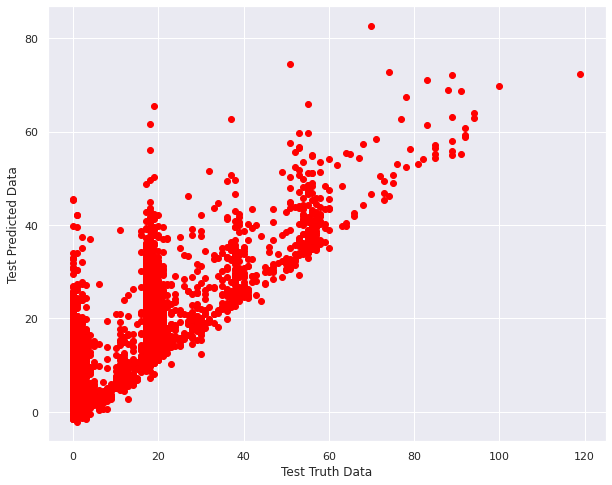

In [131]:
plt.scatter(y_test,y_pred,color='red') 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
sns.set(rc={'figure.figsize':(10,8)})


***B)Ridge Regression***

In [132]:
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)

Ridge()

In [133]:
ridge_pred=ridge.predict(x_test_scaled)

***Mean Squared Error***

In [134]:
error=mean_squared_error(ridge_pred,y_test)
print(error)

43.615741163310595


***Plot the data***

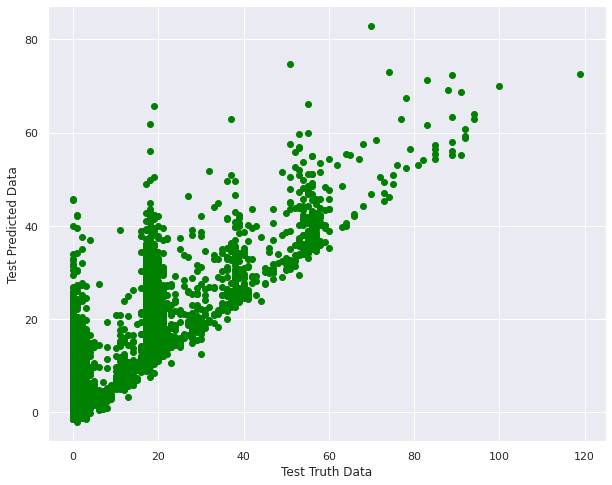

In [135]:
plt.scatter(y_test,ridge_pred,color='green') 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
sns.set(rc={'figure.figsize':(10,8)})
